In [3]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load data dari file Excel
df = pd.read_excel('Canada.xlsx', sheet_name=None)

1. Pembersihan Data

a. Hapus kolom kosong


In [5]:
# Hapus kolom yang seluruh nilainya NaN dari df['Canada by Citizenship']
df_drop = df['Canada by Citizenship'].dropna(axis=1, how='all')

b. Tambahkan kolom baru Total_1980_2013 yang berisi total migran per negara.

In [6]:
# Identifikasi kolom tahun (1980-2013)
year_columns = [col for col in df_drop.columns if isinstance(col, int) and 1980 <= col <= 2013]
print(f"Kolom tahun yang ditemukan: {year_columns}")

# Tambahkan kolom Total_1980_2013 yang berisi total migran per negara
df_drop['Total_1980_2013'] = df_drop[year_columns].sum(axis=1)

# Tampilkan beberapa baris untuk verifikasi
print(f"\nKolom baru 'Total_1980_2013' telah ditambahkan")
print(f"Shape data sekarang: {df_drop.shape}")
print(f"\nBeberapa negara dengan total migran:")
df_drop[['OdName', 'Total_1980_2013']].head(10)

Kolom tahun yang ditemukan: [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]

Kolom baru 'Total_1980_2013' telah ditambahkan
Shape data sekarang: (195, 39)

Beberapa negara dengan total migran:


/tmp/ipython-input-2189240384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['Total_1980_2013'] = df_drop[year_columns].sum(axis=1)


,OdName,Total_1980_2013
0,Afghanistan,58639
1,Albania,15699
2,Algeria,69439
3,American Samoa,6
4,Andorra,15
5,Angola,2113
6,Antigua and Barbuda,981
7,Argentina,19596
8,Armenia,3310
9,Australia,23829


c. Tampilkan 5 negara dengan total imigran tertinggi beserta jumlahnya.

In [7]:
# Top 5 negara dengan total imigran tertinggi
top5 = df_drop[['OdName', 'Total_1980_2013']].sort_values(by='Total_1980_2013', ascending=False).head(5)
print(top5)

                                                OdName  Total_1980_2013
79                                               India           691904
36                                               China           659962
183  United Kingdom of Great Britain and Northern I...           551500
136                                        Philippines           511391
130                                           Pakistan           241600


d. Ubah nama kolom pada dataset agar lebih mudah dibaca:
• OdName menjadi Country
• AreaName menjadi Continent
• RegName menjadi Region

In [8]:
# Ubah nama kolom
df_drop.rename(columns={
    'OdName': 'Country',
    'AreaName': 'Continent',
    'RegName': 'Region'
}, inplace=True)

/tmp/ipython-input-2137477440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop.rename(columns={


2. Analisis


a. Hitung total imigran (dari seluruh negara) per tahun (1980–2013) dan tampilkan tahun dengan
total tertinggi dan terendah.

In [9]:
# Total imigran per tahun
total_per_year = df_drop[year_columns].sum(axis=0)
max_year = total_per_year.idxmax()
min_year = total_per_year.idxmin()
print(f'Tahun dengan total imigran tertinggi: {max_year} ({total_per_year[max_year]})')
print(f'Tahun dengan total imigran terendah: {min_year} ({total_per_year[min_year]})')

Tahun dengan total imigran tertinggi: 2010 (276956)
Tahun dengan total imigran terendah: 1985 (69978)


b. Gambarkan line chart tren total imigran per tahun dengan label sumbu yang jelas. (x=tahun,
y=jumlah imigran)

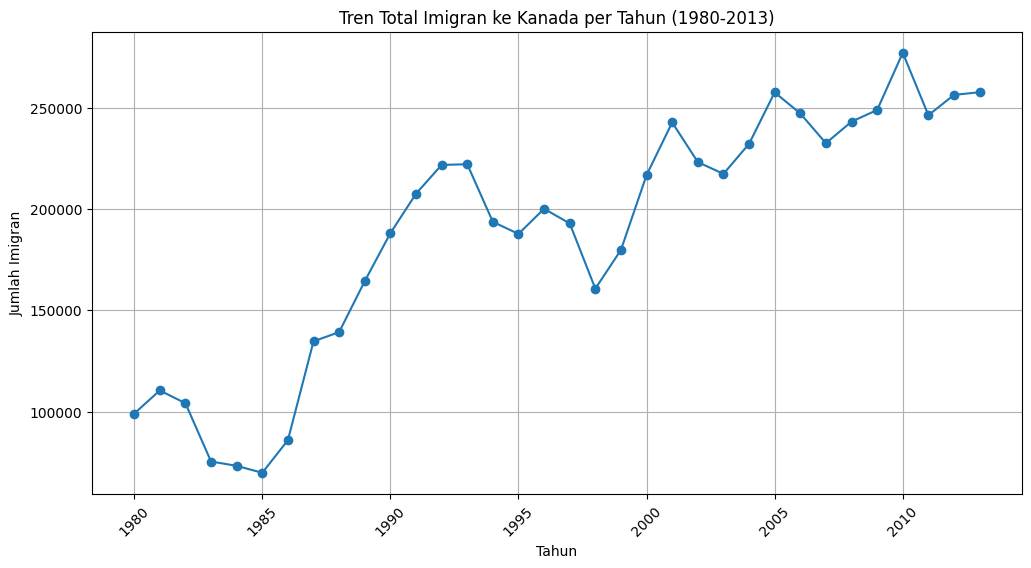

In [10]:
# Visualisasi tren imigran per tahun
plt.figure(figsize=(12,6))
plt.plot(total_per_year.index, total_per_year.values, marker='o')
plt.title('Tren Total Imigran ke Kanada per Tahun (1980-2013)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Imigran')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

c. Sebutkan tren umum migrasi ke Kanada berdasarkan grafik tersebut (apakah meningkat,
menurun, atau fluktuatif ?).


In [11]:
# Interpretasi tren
if total_per_year.iloc[-1] > total_per_year.iloc[0]:
    trend = "meningkat"
else:
    trend = "menurun atau fluktuatif"
print(f"Tren migrasi ke Kanada secara umum: {trend}")

Tren migrasi ke Kanada secara umum: meningkat


3. Analisis Per Wilayah


a. Kelompokkan data berdasarkan AreaName, hitung total imigran 1980–2013 untuk tiap
wilayah.


In [12]:
# Total imigran per wilayah
total_per_continent = df_drop.groupby('Continent')['Total_1980_2013'].sum().sort_values(ascending=False)
print(total_per_continent)

Continent
Asia                               3317794
Europe                             1410947
Latin America and the Caribbean     765148
Africa                              618948
Northern America                    241142
Oceania                              55174
Name: Total_1980_2013, dtype: int64


b. Tampilkan hasilnya dalam bar chart

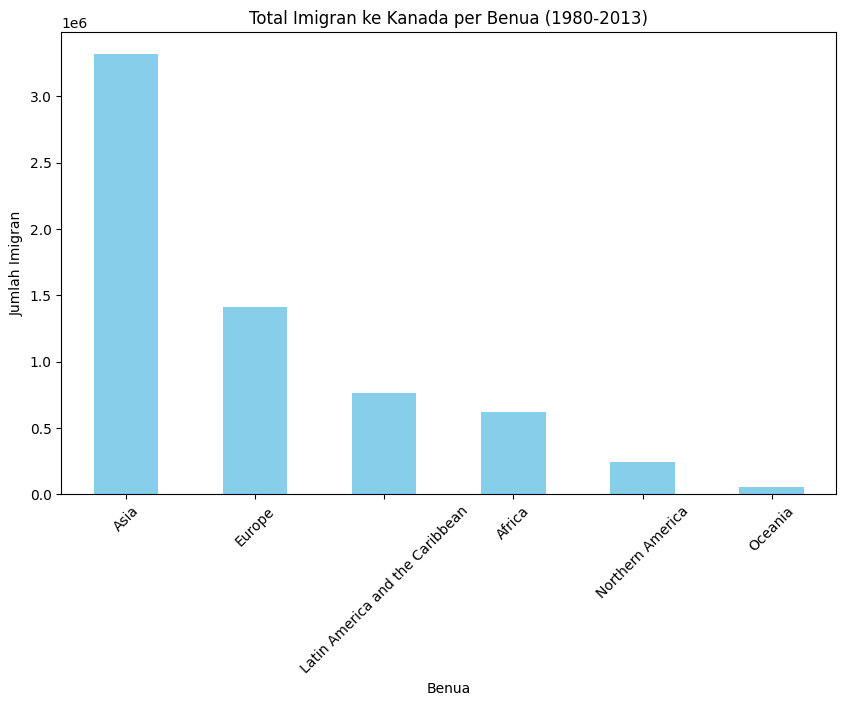

In [13]:
# Bar chart total imigran per wilayah
plt.figure(figsize=(10,6))
total_per_continent.plot(kind='bar', color='skyblue')
plt.title('Total Imigran ke Kanada per Benua (1980-2013)')
plt.xlabel('Benua')
plt.ylabel('Jumlah Imigran')
plt.xticks(rotation=45)
plt.show()

c. Sebutkan wilayah dengan total imigran terbanyak dan paling sedikit, lalu tulis interpretasi
singkatnya

In [14]:
# Wilayah terbanyak dan tersedikit
max_continent = total_per_continent.idxmax()
min_continent = total_per_continent.idxmin()
print(f'Wilayah dengan total imigran terbanyak: {max_continent} ({total_per_continent[max_continent]})')
print(f'Wilayah dengan total imigran paling sedikit: {min_continent} ({total_per_continent[min_continent]})')
print(f'Interpretasi: Benua {max_continent} merupakan sumber utama imigran, sedangkan {min_continent} paling sedikit.')

Wilayah dengan total imigran terbanyak: Asia (3317794)
Wilayah dengan total imigran paling sedikit: Oceania (55174)
Interpretasi: Benua Asia merupakan sumber utama imigran, sedangkan Oceania paling sedikit.


4. Tambahan:

Lakukan komparasi jumlah imigran dari Pakistan dan Afghanistan selama tahun 1980–2013.
• Hitung total imigran masing-masing negara untuk setiap tahun.
• Buat stacked area chart yang menampilkan kontribusi kedua negara dari tahun ke tahun.
• Jelaskan bagaimana tren migrasi Pakistan dan Afghanistan ke Kanada, apakah salah satu
negara mendominasi, dan bagaimana perubahan dari waktu ke waktu

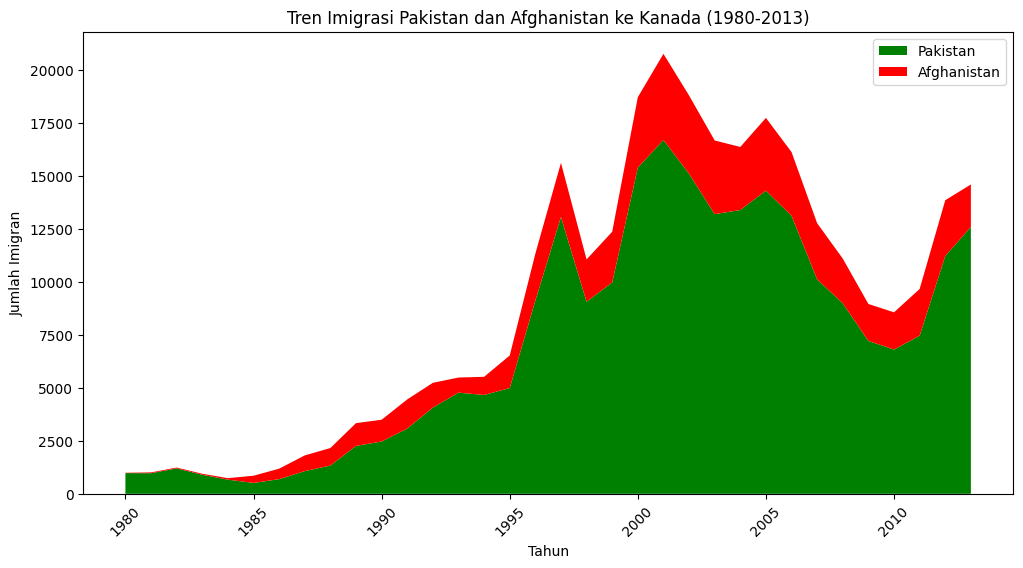

Negara yang mendominasi migrasi ke Kanada: Pakistan
Total Pakistan: 241600, Total Afghanistan: 58639


In [15]:
# Filter data Pakistan dan Afghanistan
pakistan = df_drop[df_drop['Country'] == 'Pakistan'][year_columns].sum()
afghanistan = df_drop[df_drop['Country'] == 'Afghanistan'][year_columns].sum()

# Stacked area chart
plt.figure(figsize=(12,6))
plt.stackplot(year_columns, pakistan, afghanistan, labels=['Pakistan', 'Afghanistan'], colors=['green','red'])
plt.title('Tren Imigrasi Pakistan dan Afghanistan ke Kanada (1980-2013)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Imigran')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Interpretasi
dominasi = 'Pakistan' if pakistan.sum() > afghanistan.sum() else 'Afghanistan'
print(f"Negara yang mendominasi migrasi ke Kanada: {dominasi}")
print(f"Total Pakistan: {pakistan.sum()}, Total Afghanistan: {afghanistan.sum()}")

5. Insight

• Negara mana paling banyak mengirim imigran?
• Benua yang paling berkontribusi terhadap total migran ke Kanada?
• Apakah jumlah migrasi cenderung naik dari tahun ke tahun?


In [16]:
top_country = df_drop.loc[df_drop['Total_1980_2013'].idxmax(), 'Country']
top_continent = total_per_continent.idxmax()
trend_migrasi = 'naik' if total_per_year.iloc[-1] > total_per_year.iloc[0] else 'turun/fluktuatif'
print(f"Negara pengirim imigran terbanyak: {top_country}")
print(f"Benua dengan kontribusi migran terbanyak: {top_continent}")
print(f"Jumlah migrasi cenderung: {trend_migrasi}")

Negara pengirim imigran terbanyak: India
Benua dengan kontribusi migran terbanyak: Asia
Jumlah migrasi cenderung: naik


https://colab.research.google.com/drive/1bzjA8wZwptWpQ6wyg4JOQi8DFNmjUGy_